In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge

In [3]:
from sklearn.model_selection import train_test_split

# split data into training and test sets
x = pd.read_csv('./HW2 Data/p1/x.csv')
y = pd.read_csv('./HW2 Data/p1/y.csv')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

Iteration 1: R2 Score = 0.9373618687585112
Iteration 2: R2 Score = 0.9326210745802642
Iteration 3: R2 Score = 0.9167114458604265
Iteration 4: R2 Score = 0.9371376136596663
Iteration 5: R2 Score = 0.9202943509570803
Iteration 6: R2 Score = 0.9553621404294244
Iteration 7: R2 Score = 0.9294263178914252
Iteration 8: R2 Score = 0.8431727966469459
Iteration 9: R2 Score = 0.9028060753136141
Iteration 10: R2 Score = 0.9170190995665579
Iteration 11: R2 Score = 0.9353685667144884
Iteration 12: R2 Score = 0.9468560799604021
Iteration 13: R2 Score = 0.9226871456787454
Iteration 14: R2 Score = 0.8681072678760257
Iteration 15: R2 Score = 0.9176076327534942
Iteration 16: R2 Score = 0.9322567417719697
Iteration 17: R2 Score = 0.9285279500320534
Iteration 18: R2 Score = 0.951611880693096
Iteration 19: R2 Score = 0.9286193317922777
Iteration 20: R2 Score = 0.9217445348729184
Iteration 21: R2 Score = 0.8888596891611121
Iteration 22: R2 Score = 0.9325471374615737
Iteration 23: R2 Score = 0.940103171359004

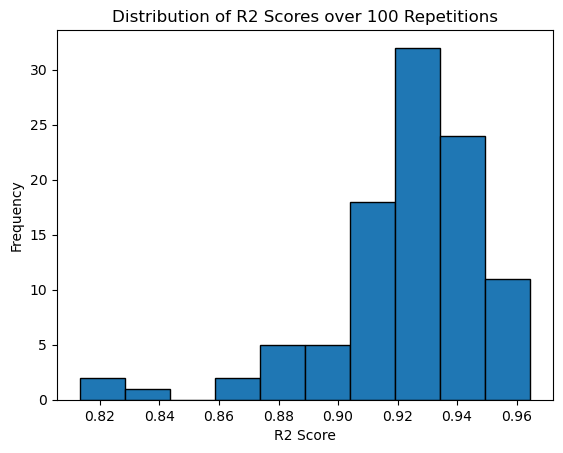

In [4]:
# train the model
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

# predict N = 100 times
r2_scores = []

for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    print(f"Iteration {i+1}: R2 Score = {r2}")

# Plot histogram of R2 scores
plt.hist(r2_scores, bins=10, edgecolor='black')
plt.title('Distribution of R2 Scores over 100 Repetitions')
plt.xlabel('R2 Score')
plt.ylabel('Frequency')
plt.show()

# we get a left skewed distribution of R2 scores

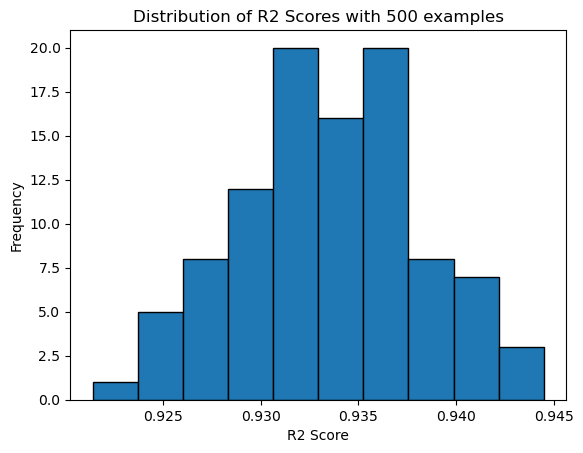

In [5]:
# generating my own data

# Parameters
n = 500  # number of examples
d = 7    # number of predictors
dd = 7  # number of noisy channels

# Generate normally distributed predictors (IVs)
x = np.random.randn(n, d)
# Add intercept column
x = np.column_stack((np.ones((n, 1)), x))
# Generate random weights for forward model
w = np.random.randn(d+1, 1)
# Normalize regression coefficients to unit length
w = w / np.sqrt(np.sum(w**2))
# Generate dependent variable
y = x @ w

# Add noise to dependent variable
std = 0.25  # standard deviation of additive noise
y = y + std * np.random.randn(*y.shape)

# Add noisy channels
x = np.column_stack([x, np.random.randn(n, dd)])

# Shuffle predictors and noise channels
ix = np.random.permutation(x.shape[1])
x = x[:, ix]  # predictors are no longer on columns 1:d+1



# train and test model on different number of noisy channels and samples
# predict N = 100 times
r2_scores = []

for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

# Plot histogram of R2 scores
plt.hist(r2_scores, bins=10, edgecolor='black')
plt.title('Distribution of R2 Scores with 500 examples')
plt.xlabel('R2 Score')
plt.ylabel('Frequency')
plt.show()

# increasing the number of samples gives a distribution with less variance r2

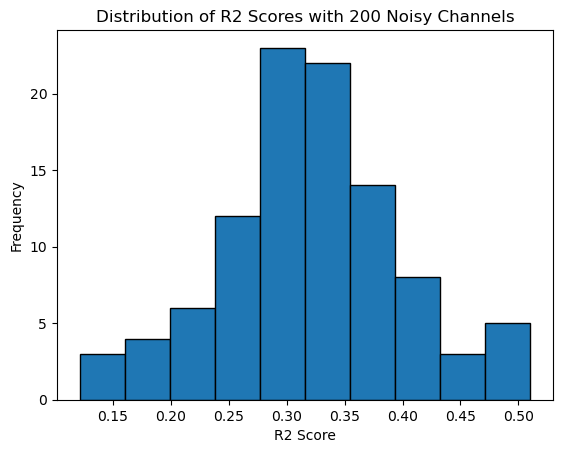

In [6]:
# generating my own data

# Parameters
n = 122  # number of examples
d = 7    # number of predictors
dd = 200  # number of noisy channels

# Generate normally distributed predictors (IVs)
x = np.random.randn(n, d)
# Add intercept column
x = np.column_stack((np.ones((n, 1)), x))
# Generate random weights for forward model
w = np.random.randn(d+1, 1)
# Normalize regression coefficients to unit length
w = w / np.sqrt(np.sum(w**2))
# Generate dependent variable
y = x @ w

# Add noise to dependent variable
std = 0.25  # standard deviation of additive noise
y = y + std * np.random.randn(*y.shape)

# Add noisy channels
x = np.column_stack([x, np.random.randn(n, dd)])

# Shuffle predictors and noise channels
ix = np.random.permutation(x.shape[1])
x = x[:, ix]  # predictors are no longer on columns 1:d+1



# train and test model on different number of noisy channels and samples
# predict N = 100 times
r2_scores = []

for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

# Plot histogram of R2 scores
plt.hist(r2_scores, bins=10, edgecolor='black')
plt.title('Distribution of R2 Scores with 200 Noisy Channels')
plt.xlabel('R2 Score')
plt.ylabel('Frequency')
plt.show()

# increasing the number of noisy channels decreases the r2 score because it does not provide meaningful information

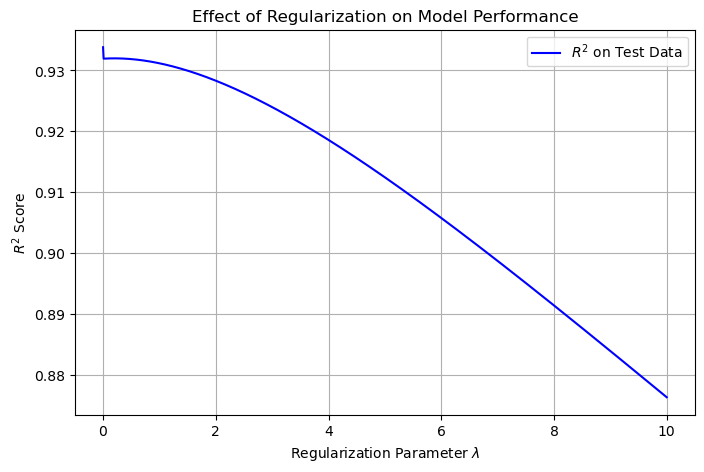

In [7]:
# ridge regression
x = pd.read_csv('./HW2 Data/p1/x.csv')
y = pd.read_csv('./HW2 Data/p1/y.csv')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

# Define lambda values
alphas = np.linspace(0, 10, 1000)

# Store R^2 scores
r2_scores = []

# Loop over lambda values and compute R^2 on test data
for alpha in alphas:
    model = Ridge(alpha=alpha)  # Set regularization strength
    model.fit(x_train, y_train)  # Train model
    y_pred = model.predict(x_test)  # Predict on test set
    r2_scores.append(r2_score(y_test, y_pred))  # Compute R^2 score

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(alphas, r2_scores, label=r'$R^2$ on Test Data', color='b')
plt.xlabel(r'Regularization Parameter $\lambda$')
plt.ylabel(r'$R^2$ Score')
plt.title(r'Effect of Regularization on Model Performance')
plt.legend()
plt.grid()
plt.show()